<a href="https://colab.research.google.com/github/Kiruthika-KB/Final-Project/blob/main/Instagram_Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.	Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [26]:
import pandas as pd
dataset = pd.read_csv("Influencer.csv")

In [27]:
# Display column data types to understand the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [28]:
dataset.shape

(200, 10)

In [29]:
df=dataset

In [30]:
df.shape

(200, 10)

In [32]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [33]:
df=dataset.drop(['Rank','Channel Info','Influence Score','60-Day Eng Rate','Country Or Region'],axis=1)

In [34]:
df.columns

Index(['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes',
       'Total Likes'],
      dtype='object')

In [35]:
dataset.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [36]:
def convert_to_float(value):
    try:
        # Check if the value is a string before looking for 'k' or 'm'
        if isinstance(value, str):
            if 'k' in value:
                return float(value.replace('k', '')) * 1_000
            elif 'm' in value:
                return float(value.replace('m', '')) * 1_000_000
        # If not a string or doesn't contain 'k' or 'm', try converting to float directly
        return float(value)
    except ValueError:
        return None  # Handle invalid cases gracefully

# Iterate through the columns and convert
for col in df.columns:
    df[col] = df[col].apply(convert_to_float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Followers            200 non-null    float64
 1   Avg. Likes           200 non-null    float64
 2   Posts                200 non-null    float64
 3   New Post Avg. Likes  200 non-null    float64
 4   Total Likes          48 non-null     float64
dtypes: float64(5)
memory usage: 7.9 KB


In [38]:
# Select only numeric columns for correlation analysis
df['Rank']=dataset['Rank']
df['Influence Score']=dataset['Influence Score']
df['60-Day Eng Rate']=dataset['60-Day Eng Rate']

In [39]:
df.columns

Index(['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes',
       'Total Likes', 'Rank', 'Influence Score', '60-Day Eng Rate'],
      dtype='object')

In [40]:
column=['Followers','Avg. Likes','Posts','New Post Avg. Likes','Total Likes','Rank','Influence Score','60-Day Eng Rate']
numeric_data=df[column]

In [41]:
# Compute the correlation matrix
correlation_matrix =numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                      Followers  Avg. Likes     Posts  New Post Avg. Likes  \
Followers             1.000000    0.346829  0.069171             0.260764   
Avg. Likes            0.346829    1.000000 -0.348795             0.892784   
Posts                 0.069171   -0.348795  1.000000            -0.285154   
New Post Avg. Likes   0.260764    0.892784 -0.285154             1.000000   
Total Likes          -0.202780   -0.063060  0.326416            -0.090676   
Rank                 -0.698193   -0.277699 -0.058132            -0.272323   
Influence Score       0.365428    0.048502  0.168287             0.040011   
60-Day Eng Rate      -0.107439    0.789359 -0.334047             0.866293   

                     Total Likes      Rank  Influence Score  60-Day Eng Rate  
Followers              -0.202780 -0.698193         0.365428        -0.107439  
Avg. Likes             -0.063060 -0.277699         0.048502         0.789359  
Posts                   0.326416 -0.058132      

In [42]:
import numpy as np
# Find the most highly correlated features (excluding self-correlation)
correlation_matrix_abs = correlation_matrix.abs()
np.fill_diagonal(correlation_matrix_abs.values, 0)  # Ignore self-correlation
highly_correlated_pair = correlation_matrix_abs.stack().idxmax()
highest_correlation_value = correlation_matrix_abs.stack().max()

print(f"Most correlated features: {highly_correlated_pair}")
print(f"Correlation coefficient: {highest_correlation_value}")

Most correlated features: ('Avg. Likes', 'New Post Avg. Likes')
Correlation coefficient: 0.8927840403263658


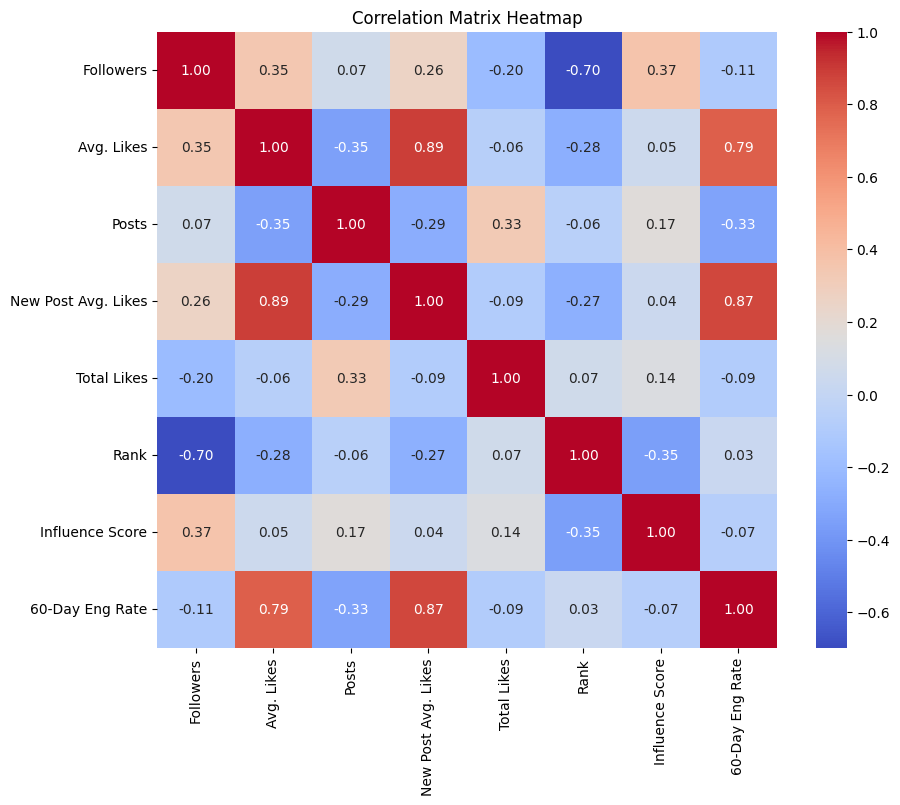

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

In [44]:
influence_freq = df['Influence Score'].value_counts()
posts_freq = df['Posts'].value_counts()
followers_freq = df['Followers'].value_counts()

print("Frequency Distribution of Influence Score:")
print(influence_freq)

print("\nFrequency Distribution of Followers:")
print(followers_freq)

print("\nFrequency Distribution of Posts:")
print(posts_freq)

Frequency Distribution of Influence Score:
Influence Score
85    30
83    20
86    19
84    18
82    12
80    12
87     9
81     9
90     7
88     7
76     6
79     6
91     6
78     5
77     4
92     4
75     4
89     4
74     3
73     2
42     2
70     1
93     1
22     1
57     1
58     1
47     1
72     1
68     1
41     1
71     1
63     1
Name: count, dtype: int64

Frequency Distribution of Followers:
Followers
36000000.0    3
33600000.0    3
68100000.0    3
33800000.0    3
52900000.0    3
             ..
64700000.0    1
64400000.0    1
63600000.0    1
63400000.0    1
33400000.0    1
Name: count, Length: 172, dtype: int64

Frequency Distribution of Posts:
Posts
10000.0    11
1200.0      9
1900.0      5
2000.0      5
9900.0      4
           ..
899.0       1
290.0       1
10100.0     1
8200.0      1
3800.0      1
Name: count, Length: 121, dtype: int64


In [45]:
len(posts_freq)

121

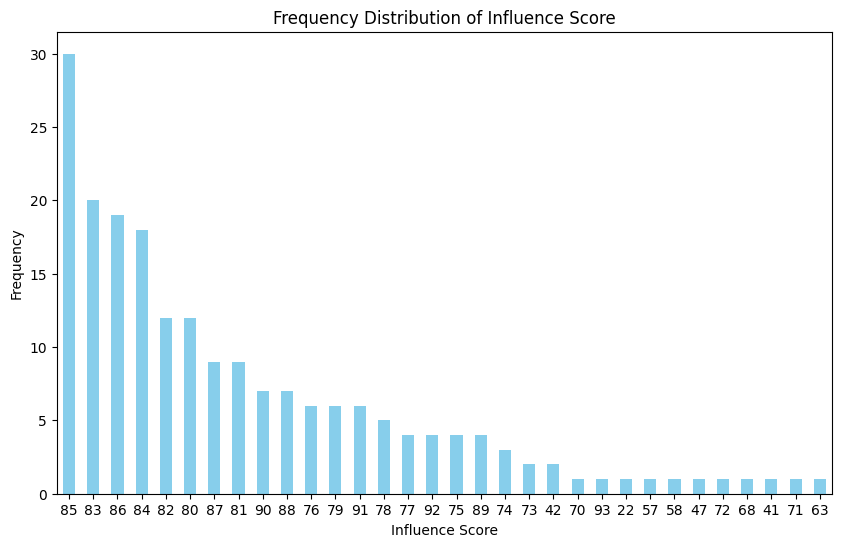

In [46]:
import seaborn as sns

# Plotting Frequency Distribution for Influence Score
plt.figure(figsize=(10, 6))
influence_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [47]:
type(followers_freq)

pandas.core.series.Series

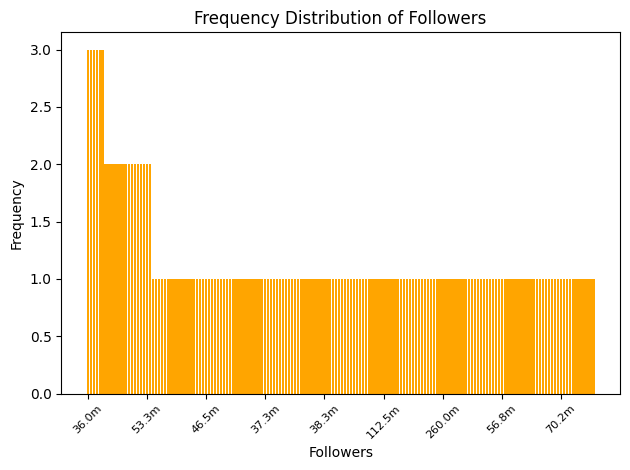

In [48]:
import matplotlib.pyplot as plt
followers = dataset['Followers']
follower_counts = followers.value_counts()
x_labels = follower_counts.index
y_values = follower_counts.values

plt.bar(x_labels, y_values, color='orange')
plt.title('Frequency Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')


plt.xticks(x_labels[::20], rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


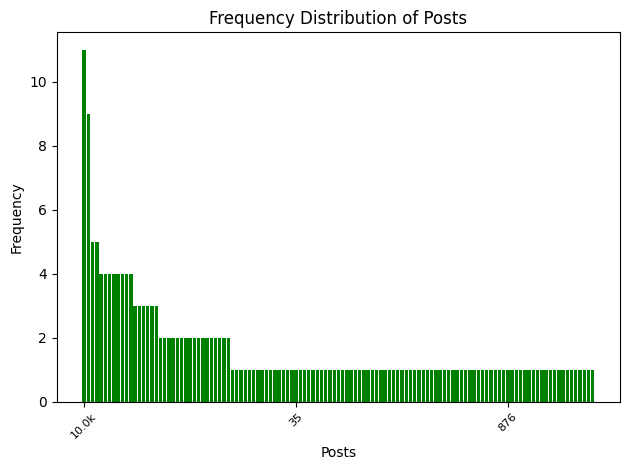

In [49]:
import matplotlib.pyplot as plt
post = dataset['Posts']
post_counts = post.value_counts()
x_labels = post_counts.index
y_values = post_counts.values

plt.bar(x_labels, y_values, color='green')
plt.title('Frequency Distribution of Posts')
plt.xlabel('Posts')
plt.ylabel('Frequency')


plt.xticks(x_labels[::50], rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

3.Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart

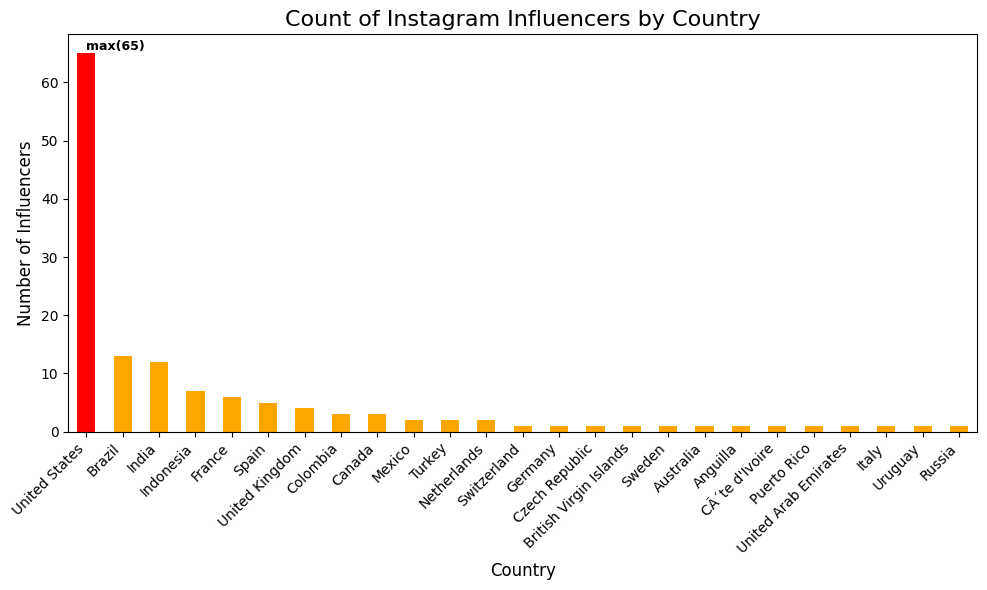

In [59]:
country_counts = dataset['Country Or Region'].value_counts()

max_value_country = country_counts.idxmax()
colors = ['orange' if country != max_value_country else 'red' for country in country_counts.index]

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color=colors)
plt.title('Count of Instagram Influencers by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Influencers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.text(
    country_counts.index.get_loc(max_value_country),
    country_counts.max(),
    f'max({country_counts.max()})',
    ha='left',
    va='bottom',
    fontsize=9,
    color='black',
    fontweight='bold'
)

plt.show()


4.Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

In [116]:
df['Channel Info'] = dataset['Channel Info']
top_followers = df.nlargest(10, 'Followers')
top_avg_likes = df.nlargest(10, 'Avg. Likes')
top_total_likes = df.nlargest(10, 'Total Likes')


In [117]:
top_avg_likes.columns

Index(['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes',
       'Total Likes', 'Rank', 'Influence Score', '60-Day Eng Rate',
       'Channel Info'],
      dtype='object')

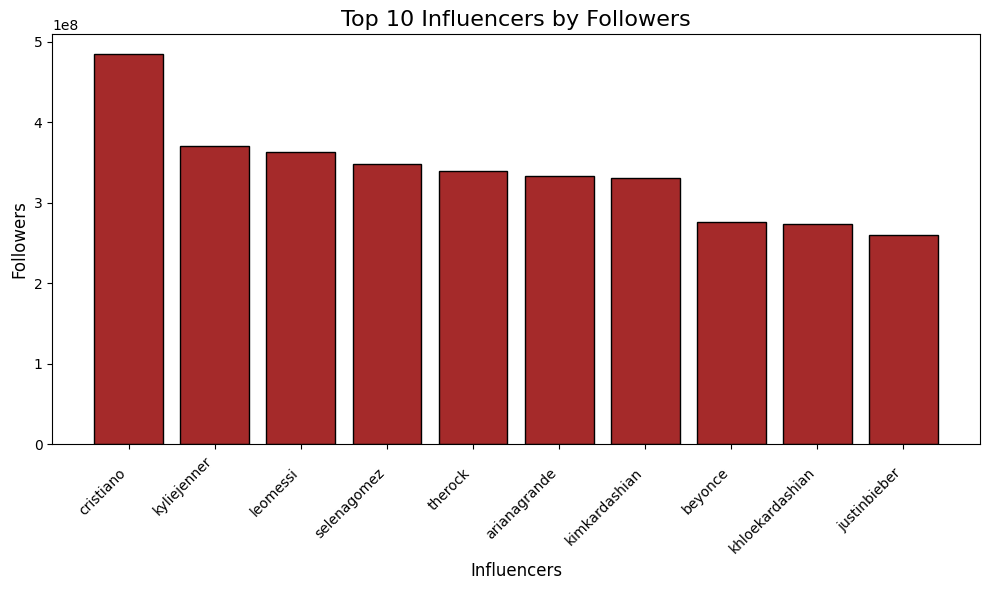

In [105]:
# Prepare data for plotting
labels = top_followers['Channel Info'].values
followers = top_followers['Followers'].values

# Plotting the bar chart with swapped x and y
plt.figure(figsize=(10, 6))
plt.bar(labels, followers, color='brown', edgecolor='black')
plt.title('Top 10 Influencers by Followers', fontsize=16)
plt.ylabel('Followers', fontsize=12)
plt.xlabel('Influencers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


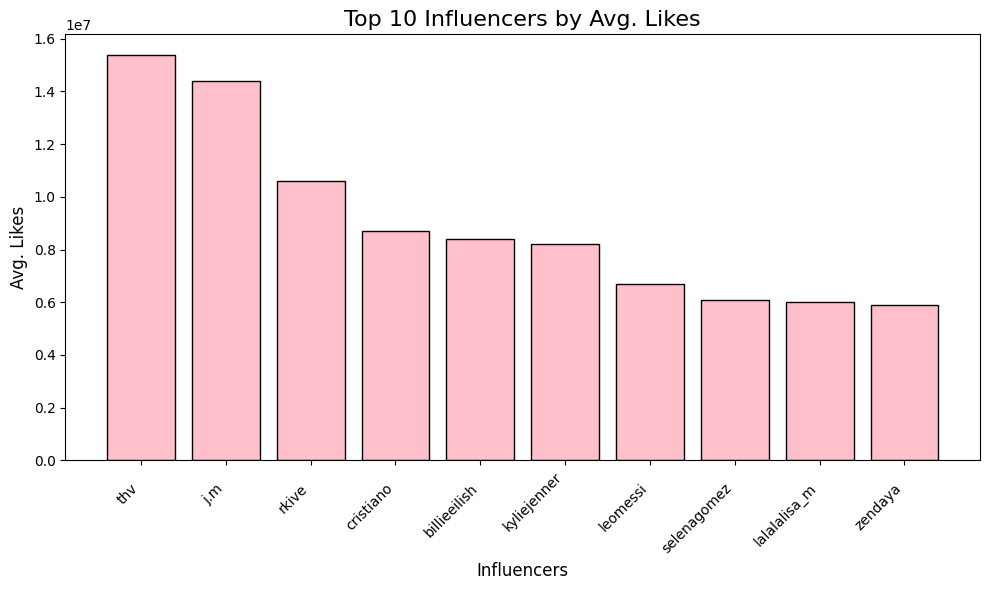

In [118]:
# Prepare data for plotting
labels = top_avg_likes['Channel Info'].values
avg_likes = top_avg_likes['Avg. Likes'].values

# Plotting the bar chart with swapped x and y
plt.figure(figsize=(10, 6))
plt.bar(labels, avg_likes, color='pink', edgecolor='black')
plt.title('Top 10 Influencers by Avg. Likes', fontsize=16)
plt.ylabel('Avg. Likes', fontsize=12)
plt.xlabel('Influencers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


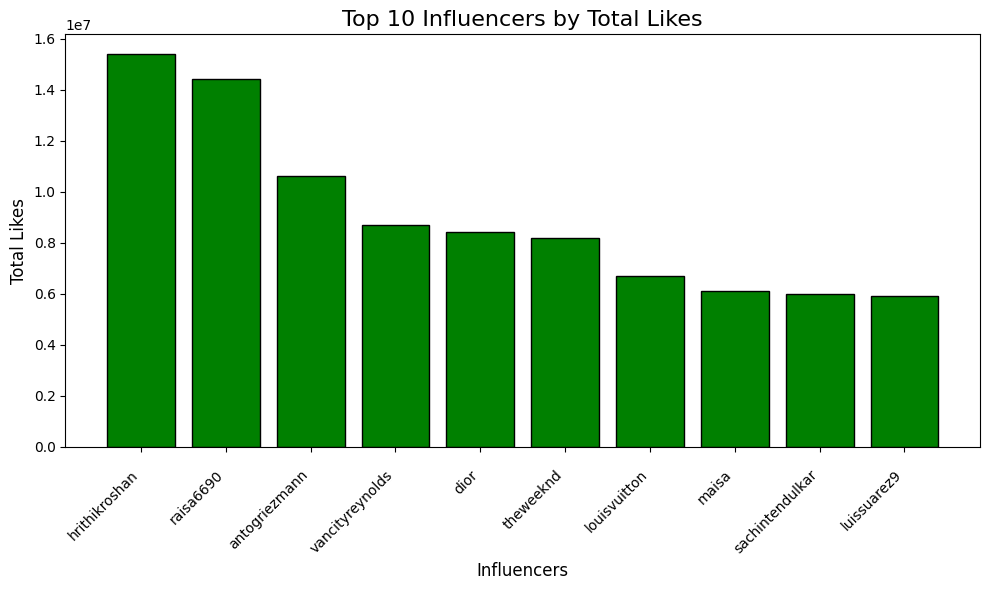

In [123]:
# Prepare data for plotting
labels = top_total_likes['Channel Info'].values
total_likes = top_total_likes['Total Likes'].values

# Plotting the bar chart with swapped x and y
plt.figure(figsize=(10, 6))
plt.bar(labels, avg_likes, color='green', edgecolor='black')
plt.title('Top 10 Influencers by Total Likes', fontsize=16)
plt.ylabel('Total Likes', fontsize=12)
plt.xlabel('Influencers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


5.Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

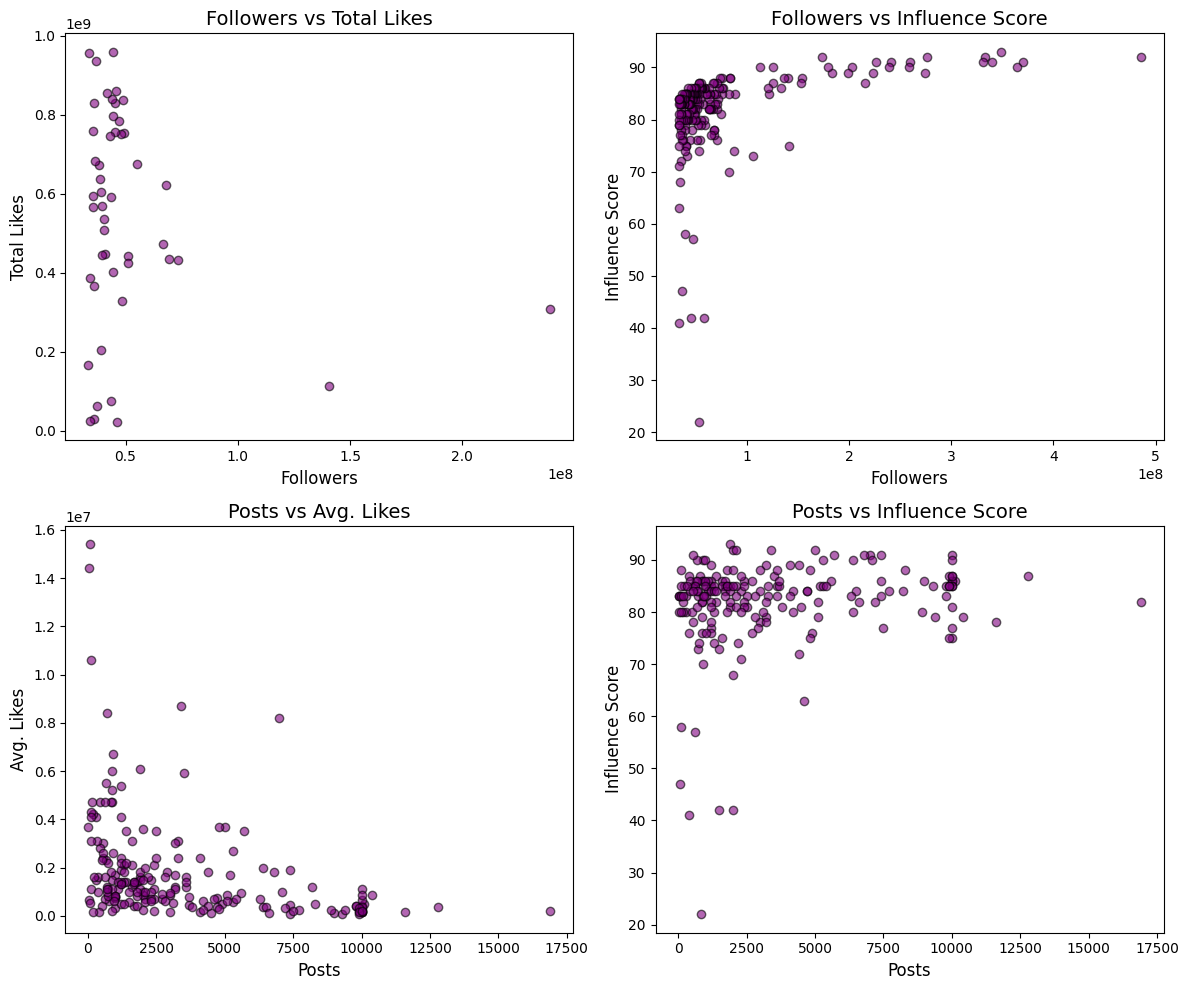

In [81]:
# Define the feature pairs for analysis
feature_pairs = [
    ('Followers', 'Total Likes'),
    ('Followers', 'Influence Score'),
    ('Posts', 'Avg. Likes'),
    ('Posts', 'Influence Score')
]

# Create scatter plots for each pair of features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (feature_x, feature_y), ax in zip(feature_pairs, axes.flatten()):

    ax.scatter(df[feature_x], df[feature_y], alpha=0.6, color='purple', edgecolor='black')
    ax.set_title(f'{feature_x} vs {feature_y}', fontsize=14)
    ax.set_xlabel(feature_x, fontsize=12)
    ax.set_ylabel(feature_y, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
